In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [76]:
df = pd.read_csv('../datasets/cleanedfix.csv')

In [77]:
# df['Day_of_Week']

In [78]:
df.iloc[:,0:5]

,Time,Age_band_of_driver,Sex_of_driver,Vehicle_driver_relation,Driving_experience
0,17:00:00,18-30,Male,Employee,1-2yr
1,17:00:00,31-50,Male,Employee,Above 10yr
2,17:00:00,18-30,Male,Employee,1-2yr
3,01:00:00,18-30,Male,Employee,5-10yr
4,01:00:00,18-30,Male,Employee,2-5yr
...,...,...,...,...,...
12311,16:00:00,31-50,Male,Employee,2-5yr
12312,18:00:00,Unknown,Male,Employee,5-10yr
12313,13:00:00,Over 51,Male,Employee,5-10yr
12314,13:00:00,18-30,Female,Employee,Above 10yr


In [79]:
df

,Time,Age_band_of_driver,Sex_of_driver,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,...,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_severity,Cause_of_accident,Accident_severity,Day
0,17:00:00,18-30,Male,Employee,1-2yr,Private Vehicle,Owner,Residential areas,Two-way (divided with broken lines road marking),Tangent road with flat terrain,...,Daylight,Normal,Stationary Object Collision,2,2,Moving forward,na,Moving Backward,Slight Injury,Monday
1,17:00:00,31-50,Male,Employee,Above 10yr,Public Transport,Owner,Office areas,Undivided Two way,Tangent road with flat terrain,...,Daylight,Normal,Vehicle Collision,2,2,Moving forward,na,Speeding,Slight Injury,Monday
2,17:00:00,18-30,Male,Employee,1-2yr,Commercial Vehicle,Owner,Recreational areas,other,Tangent road with flat terrain,...,Daylight,Normal,Stationary Object Collision,2,2,Moving forward,3,Unsafe Lane Change,Serious Injury,Monday
3,01:00:00,18-30,Male,Employee,5-10yr,Public Transport,Governmental,Office areas,other,Tangent road with mild grade and flat terrain,...,Darkness - lights lit,Normal,Vehicle Collision,2,2,Moving forward,3,Unsafe Lane Change,Slight Injury,Sunday
4,01:00:00,18-30,Male,Employee,2-5yr,Private Vehicle,Owner,Industrial areas,other,Tangent road with flat terrain,...,Darkness - lights lit,Normal,Vehicle Collision,2,2,Moving forward,na,Speeding,Slight Injury,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:00:00,31-50,Male,Employee,2-5yr,Commercial Vehicle,Owner,Outside rural areas,Undivided Two way,Tangent road with flat terrain,...,Daylight,Normal,Vehicle Collision,2,1,Moving forward,na,No Distance,Slight Injury,Wednesday
12312,18:00:00,Unknown,Male,Employee,5-10yr,Private Vehicle,Owner,Outside rural areas,Two-way (divided with broken lines road marking),Escarpments,...,Daylight,Normal,Vehicle Collision,2,1,Other,na,No Distance,Slight Injury,Sunday
12313,13:00:00,Over 51,Male,Employee,5-10yr,Public Transport,Owner,Outside rural areas,Two-way (divided with broken lines road marking),Tangent road with mountainous terrain and,...,Daylight,Normal,Vehicle Collision,1,1,Other,3,Unsafe Lane Change,Serious Injury,Sunday
12314,13:00:00,18-30,Female,Employee,Above 10yr,Commercial Vehicle,Owner,Office areas,Undivided Two way,Tangent road with mountainous terrain and,...,Darkness - lights lit,Normal,Vehicle Collision,2,1,Other,na,DUI (Drugs/Alcohol),Slight Injury,Sunday


In [80]:
df.iloc[:,5:10]

,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment
0,Private Vehicle,Owner,Residential areas,Two-way (divided with broken lines road marking),Tangent road with flat terrain
1,Public Transport,Owner,Office areas,Undivided Two way,Tangent road with flat terrain
2,Commercial Vehicle,Owner,Recreational areas,other,Tangent road with flat terrain
3,Public Transport,Governmental,Office areas,other,Tangent road with mild grade and flat terrain
4,Private Vehicle,Owner,Industrial areas,other,Tangent road with flat terrain
...,...,...,...,...,...
12311,Commercial Vehicle,Owner,Outside rural areas,Undivided Two way,Tangent road with flat terrain
12312,Private Vehicle,Owner,Outside rural areas,Two-way (divided with broken lines road marking),Escarpments
12313,Public Transport,Owner,Outside rural areas,Two-way (divided with broken lines road marking),Tangent road with mountainous terrain and
12314,Commercial Vehicle,Owner,Office areas,Undivided Two way,Tangent road with mountainous terrain and


In [81]:
df.iloc[:,10:15]

,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions
0,No junction,Asphalt roads,Dry,Daylight,Normal
1,No junction,Asphalt roads,Dry,Daylight,Normal
2,No junction,Asphalt roads,Dry,Daylight,Normal
3,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal
4,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal
...,...,...,...,...,...
12311,No junction,Asphalt roads,Dry,Daylight,Normal
12312,No junction,Asphalt roads,Dry,Daylight,Normal
12313,No junction,Asphalt roads,Dry,Daylight,Normal
12314,No junction,Asphalt roads,Dry,Darkness - lights lit,Normal


In [82]:
df.iloc[:,15:20]

,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_severity
0,Stationary Object Collision,2,2,Moving forward,na
1,Vehicle Collision,2,2,Moving forward,na
2,Stationary Object Collision,2,2,Moving forward,3
3,Vehicle Collision,2,2,Moving forward,3
4,Vehicle Collision,2,2,Moving forward,na
...,...,...,...,...,...
12311,Vehicle Collision,2,1,Moving forward,na
12312,Vehicle Collision,2,1,Other,na
12313,Vehicle Collision,1,1,Other,3
12314,Vehicle Collision,2,1,Other,na


# Kemenhub RI, Jasa Marga, PUTR, Operator Jalan

- Area occured with accident severity
- Day of week with accident severity and time
- Type of Juction with number of casualties
- LIght conditions and type of junctions
- Types of colission and type of junction and accident severity
- Road surface type with accident severity

<Figure size 1400x800 with 0 Axes>

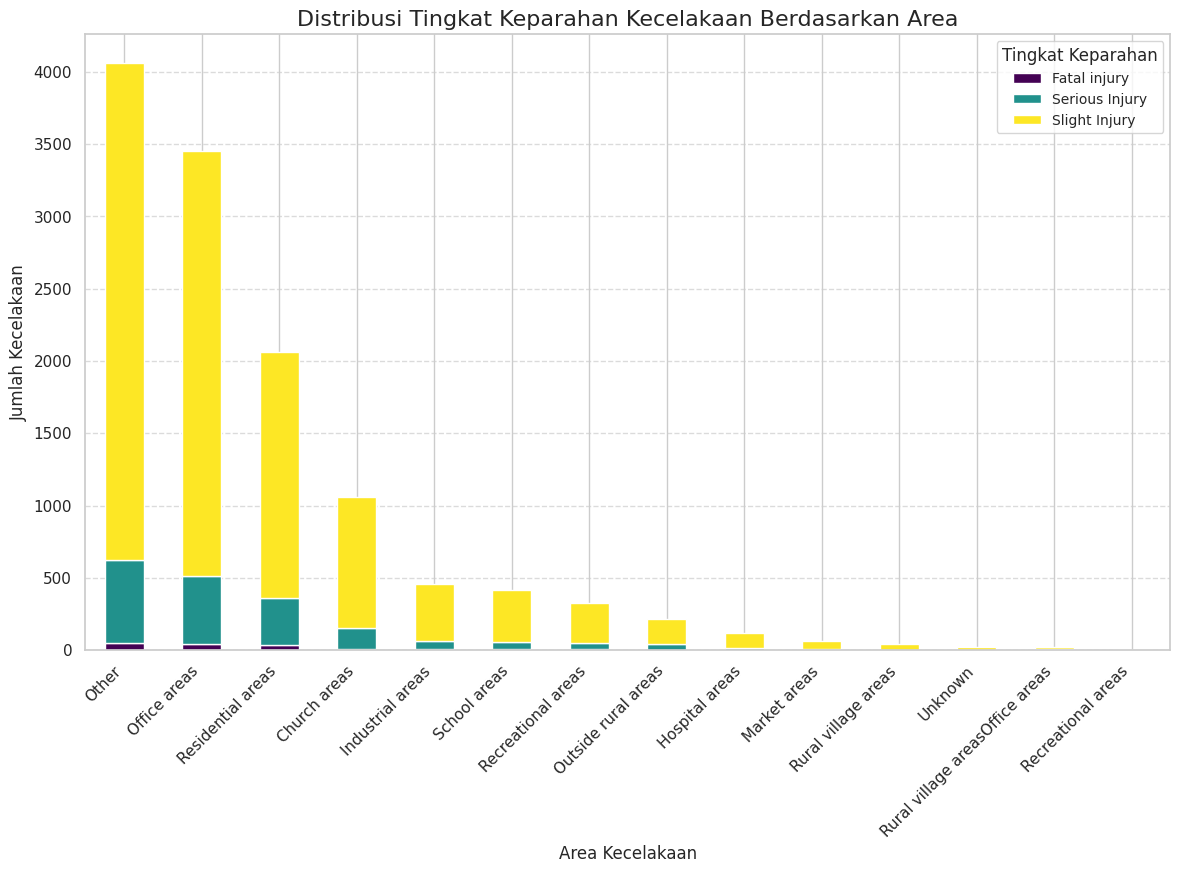

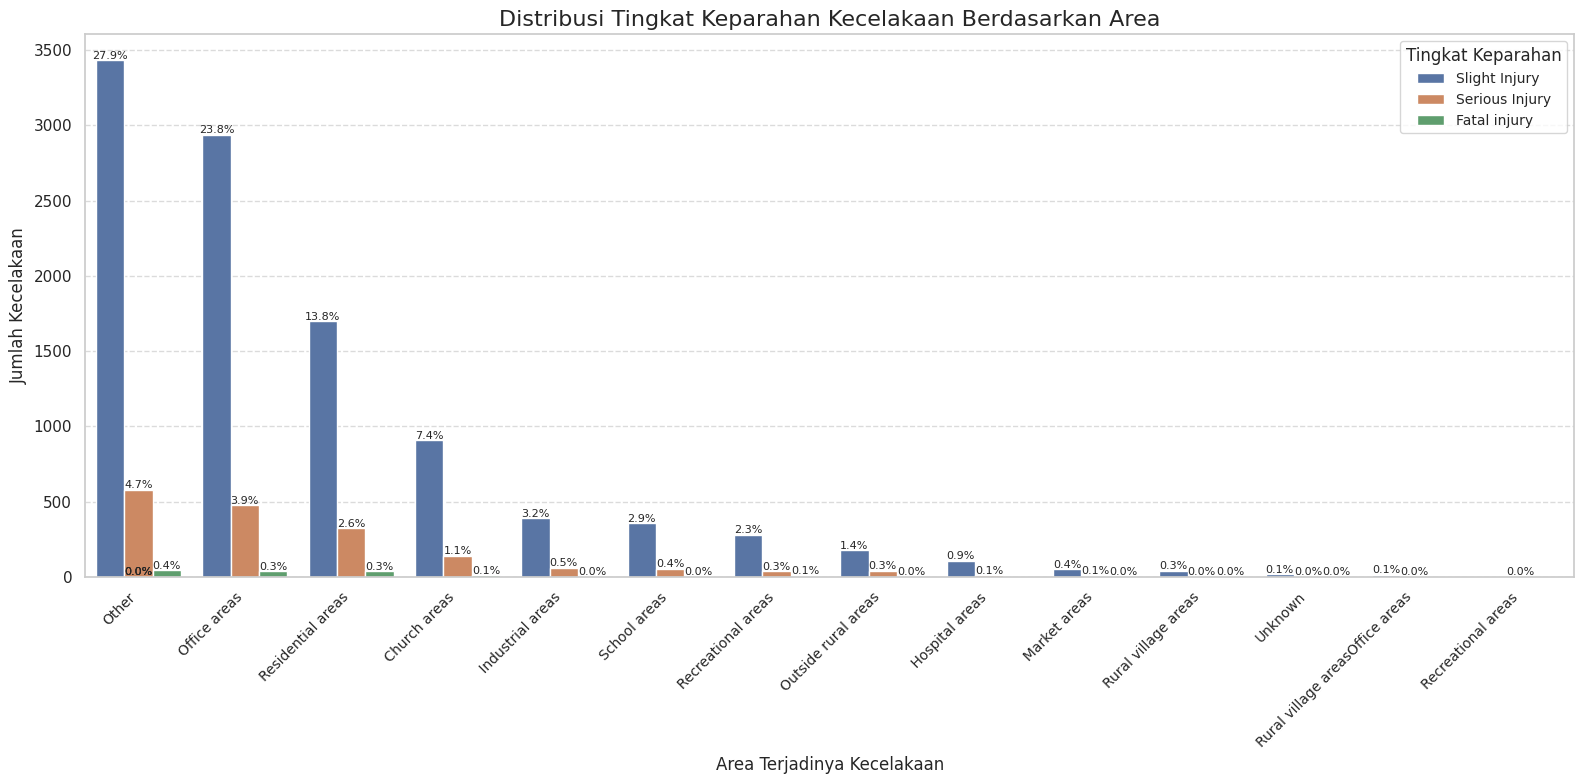

In [83]:
if 'Area_accident_occured' in df.columns and 'Accident_severity' in df.columns:
    area_severity = df.groupby(['Area_accident_occured', 'Accident_severity']).size().unstack(fill_value=0)
    area_totals = area_severity.sum(axis=1)
    area_severity = area_severity.loc[area_totals.sort_values(ascending=False).index]
    plt.figure(figsize=(14, 8))
    ax = area_severity.plot(kind='bar', stacked=True, colormap='viridis', figsize=(14, 8))
    plt.title('Distribusi Tingkat Keparahan Kecelakaan Berdasarkan Area', fontsize=16)
    plt.xlabel('Area Kecelakaan', fontsize=12)
    plt.ylabel('Jumlah Kecelakaan', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Tingkat Keparahan', fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    # for p in ax.patches:
    #     width, height = p.get_width(), p.get_height()
    #     x, y = p.get_xy()
    #     if height > 0:
    #         percentage = '{:.1f}%'.format(height / area_totals[x] * 100)
    #         ax.annotate(percentage, (x + width/2, y + height/2), ha='center', va='center', fontsize=8)
    # plt.tight_layout()
    # plt.show()
else:
    print("Kolom 'Area_accident_occured' atau 'Accident_severity' tidak ditemukan dalam dataset.")


sns.set(style="whitegrid")

plt.figure(figsize=(16, 8))
ax = sns.countplot(data=df, x="Area_accident_occured", hue="Accident_severity",
                   order=df["Area_accident_occured"].value_counts().index)

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.title("Distribusi Tingkat Keparahan Kecelakaan Berdasarkan Area", fontsize=16)
plt.xlabel("Area Terjadinya Kecelakaan", fontsize=12)
plt.ylabel("Jumlah Kecelakaan", fontsize=12)
plt.legend(title="Tingkat Keparahan", fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 10
    ax.annotate(percentage, (x, y), ha='center', fontsize=8)

plt.tight_layout()
plt.show()

/tmp/ipykernel_4990/2531789976.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour'] = pd.to_datetime(df['Time']).dt.hour


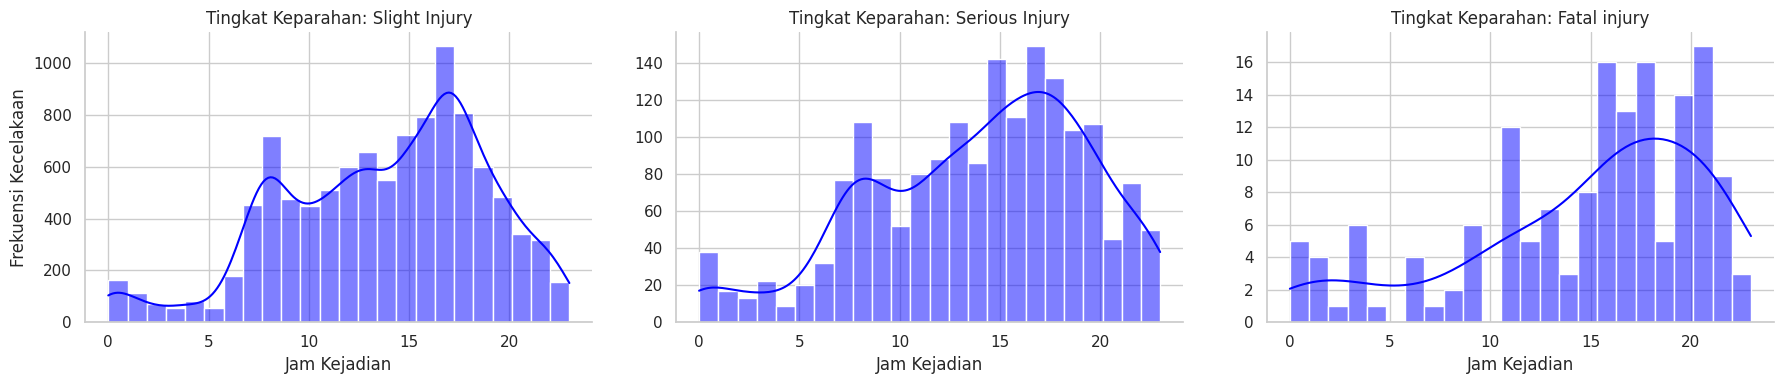

In [97]:
if 'Time' in df.columns and 'Accident_severity' in df.columns:
    df['Hour'] = pd.to_datetime(df['Time']).dt.hour

    g = sns.FacetGrid(df, col="Accident_severity", height=4, aspect=1.5, sharey=False)
    g.map(sns.histplot, "Hour", bins=24, kde=True, color="blue")
    g.set_axis_labels("Jam Kejadian", "Frekuensi Kecelakaan")
    g.set_titles(col_template="Tingkat Keparahan: {col_name}")

    plt.show()
else:
    print("Kolom 'Time' atau 'Accident_severity' tidak ditemukan dalam dataset.")

/tmp/ipykernel_4990/3152092207.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(
/tmp/ipykernel_4990/3152092207.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


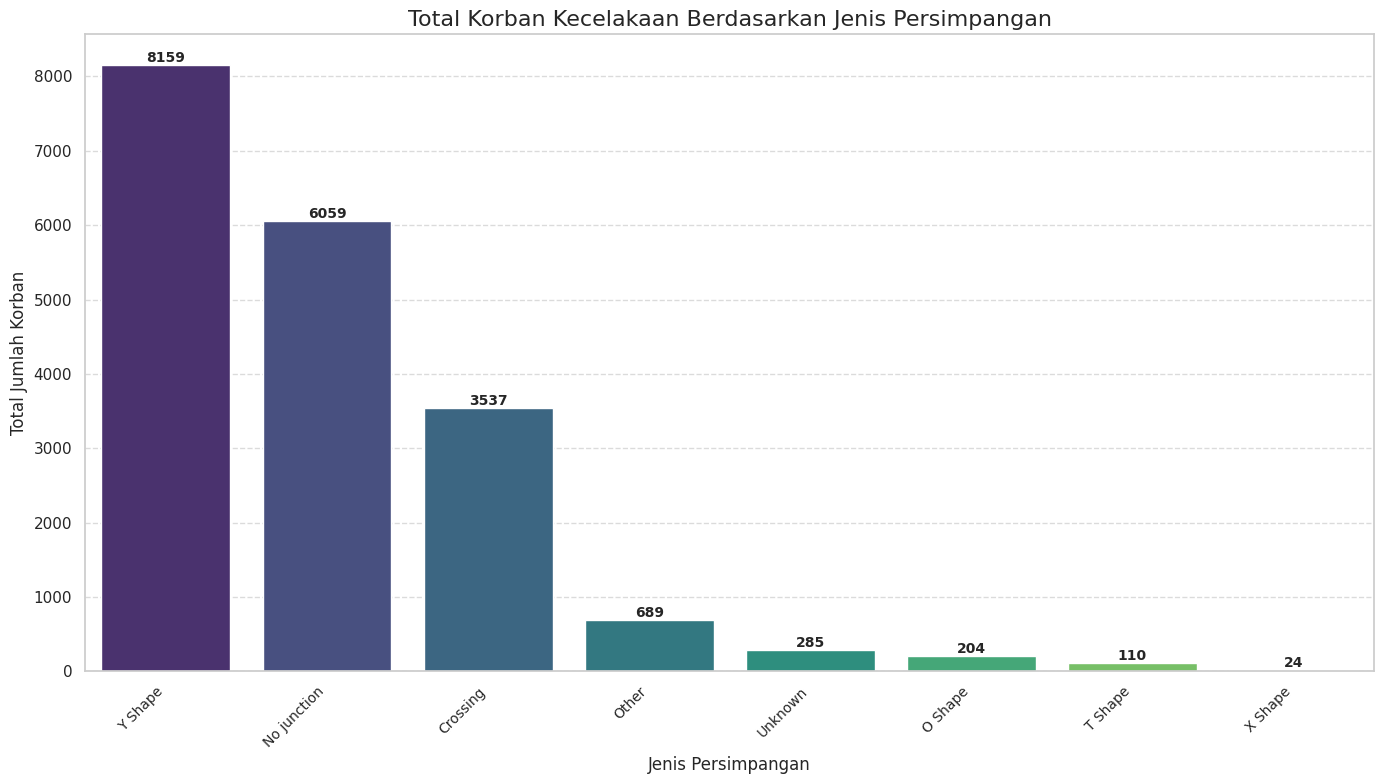

In [85]:
plt.figure(figsize=(14, 8))
ax = sns.barplot(
    data=df,
    x="Types_of_Junction",
    y="Number_of_casualties",
    estimator=sum,
    order=df["Types_of_Junction"].value_counts().index,
    ci=None,
    palette="viridis"
)

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.title("Total Korban Kecelakaan Berdasarkan Jenis Persimpangan", fontsize=16)
plt.xlabel("Jenis Persimpangan", fontsize=12)
plt.ylabel("Total Jumlah Korban", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

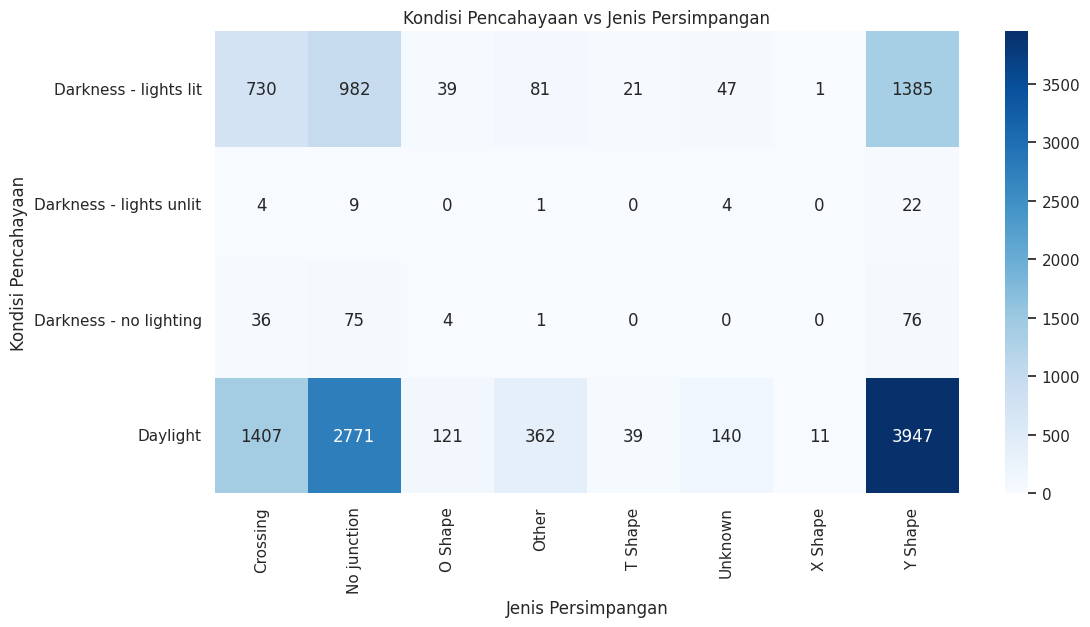

<Figure size 1600x1000 with 0 Axes>

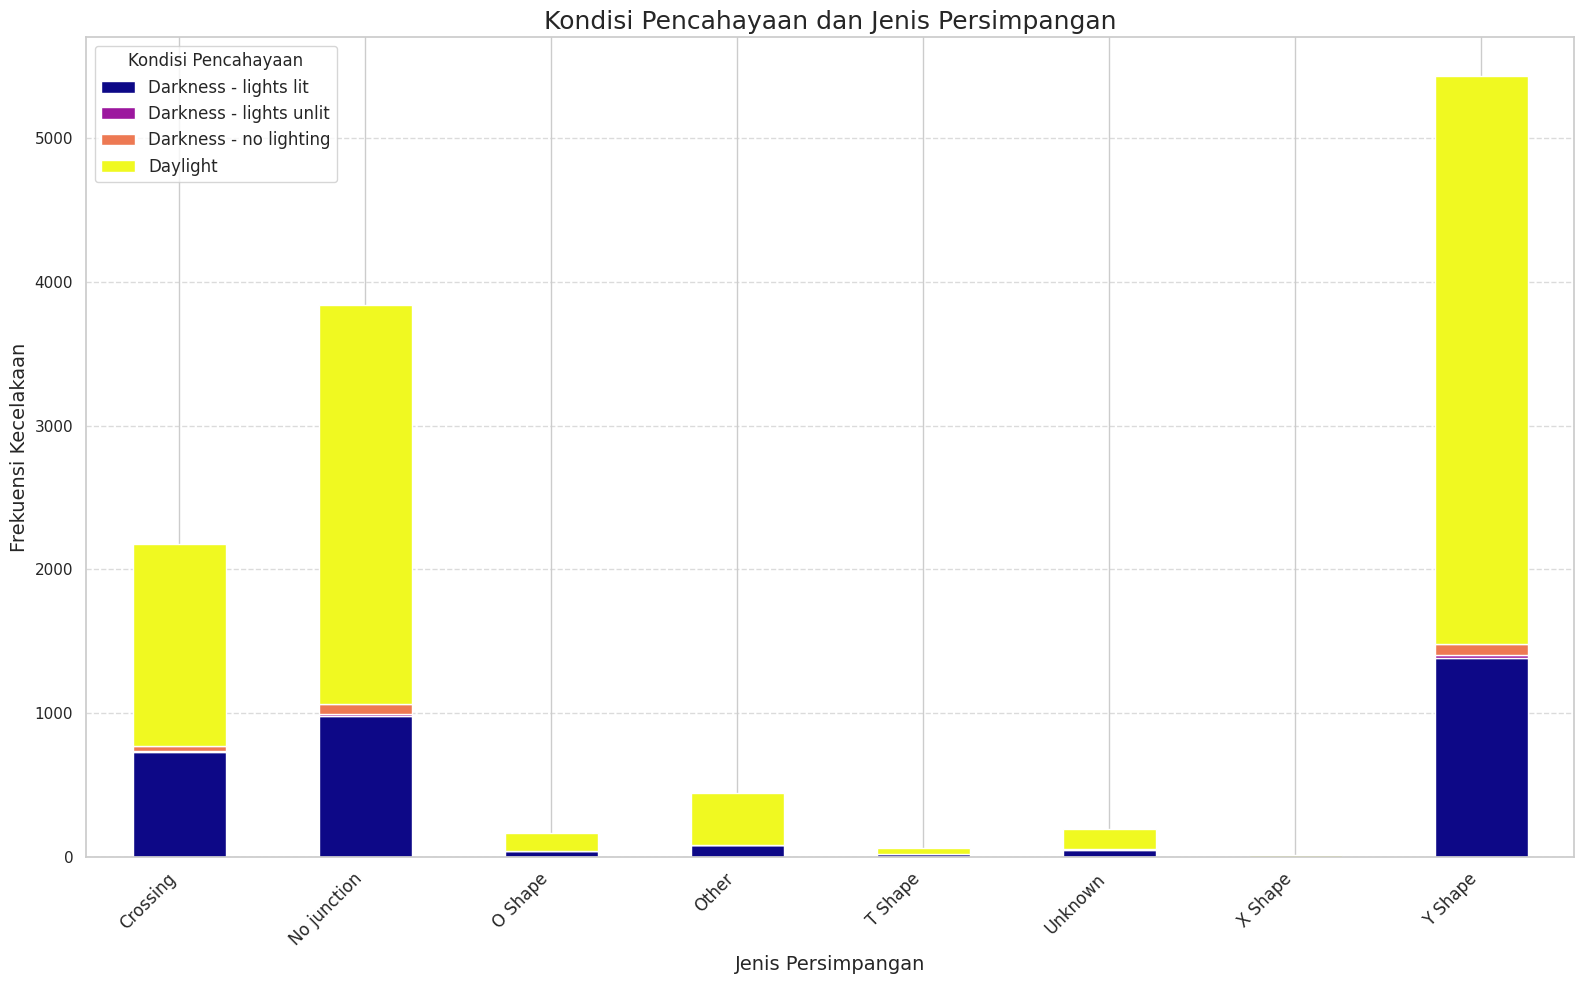

In [86]:
plt.figure(figsize=(12, 6))
sns.heatmap(pd.crosstab(df["Light_conditions"], df["Types_of_Junction"]), cmap="Blues", annot=True, fmt="d")
plt.title("Kondisi Pencahayaan vs Jenis Persimpangan")
plt.xlabel("Jenis Persimpangan")
plt.ylabel("Kondisi Pencahayaan")
plt.xticks(rotation=90)
plt.show()


if 'Light_conditions' in df.columns and 'Types_of_Junction' in df.columns:
    light_junction = df.groupby(['Types_of_Junction', 'Light_conditions']).size().unstack(fill_value=0)

    plt.figure(figsize=(16, 10))  # Perbesar ukuran figure
    ax = light_junction.plot(kind='bar', stacked=True, colormap='plasma', figsize=(16, 10))

    plt.title('Kondisi Pencahayaan dan Jenis Persimpangan', fontsize=18)
    plt.xlabel('Jenis Persimpangan', fontsize=14)
    plt.ylabel('Frekuensi Kecelakaan', fontsize=14)
    plt.legend(title='Kondisi Pencahayaan', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotasi dan perataan label x

    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Tambahkan grid horizontal

    plt.tight_layout()  # Sesuaikan layout agar tidak ada label yang terpotong
    plt.show()
else:
    print("Kolom 'Light_conditions' atau 'Types_of_Junction' tidak ditemukan dalam dataset.")

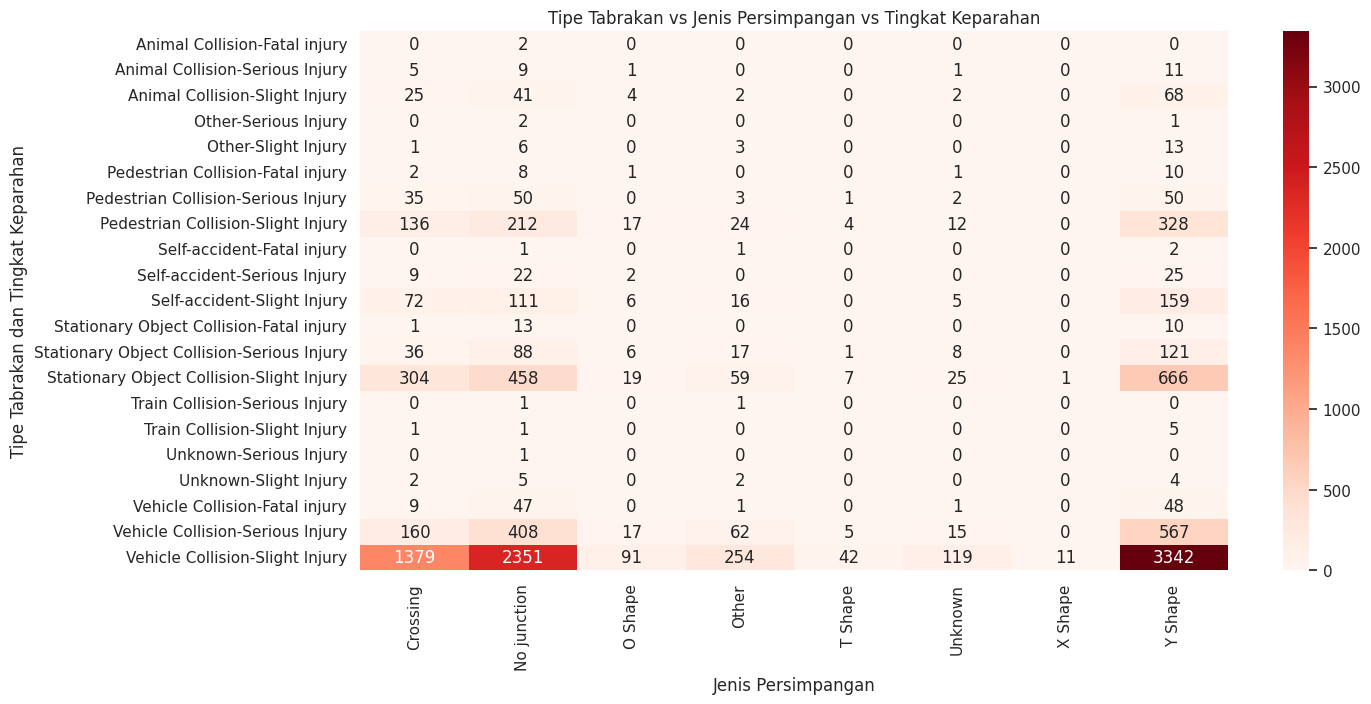

<Figure size 1800x1000 with 0 Axes>

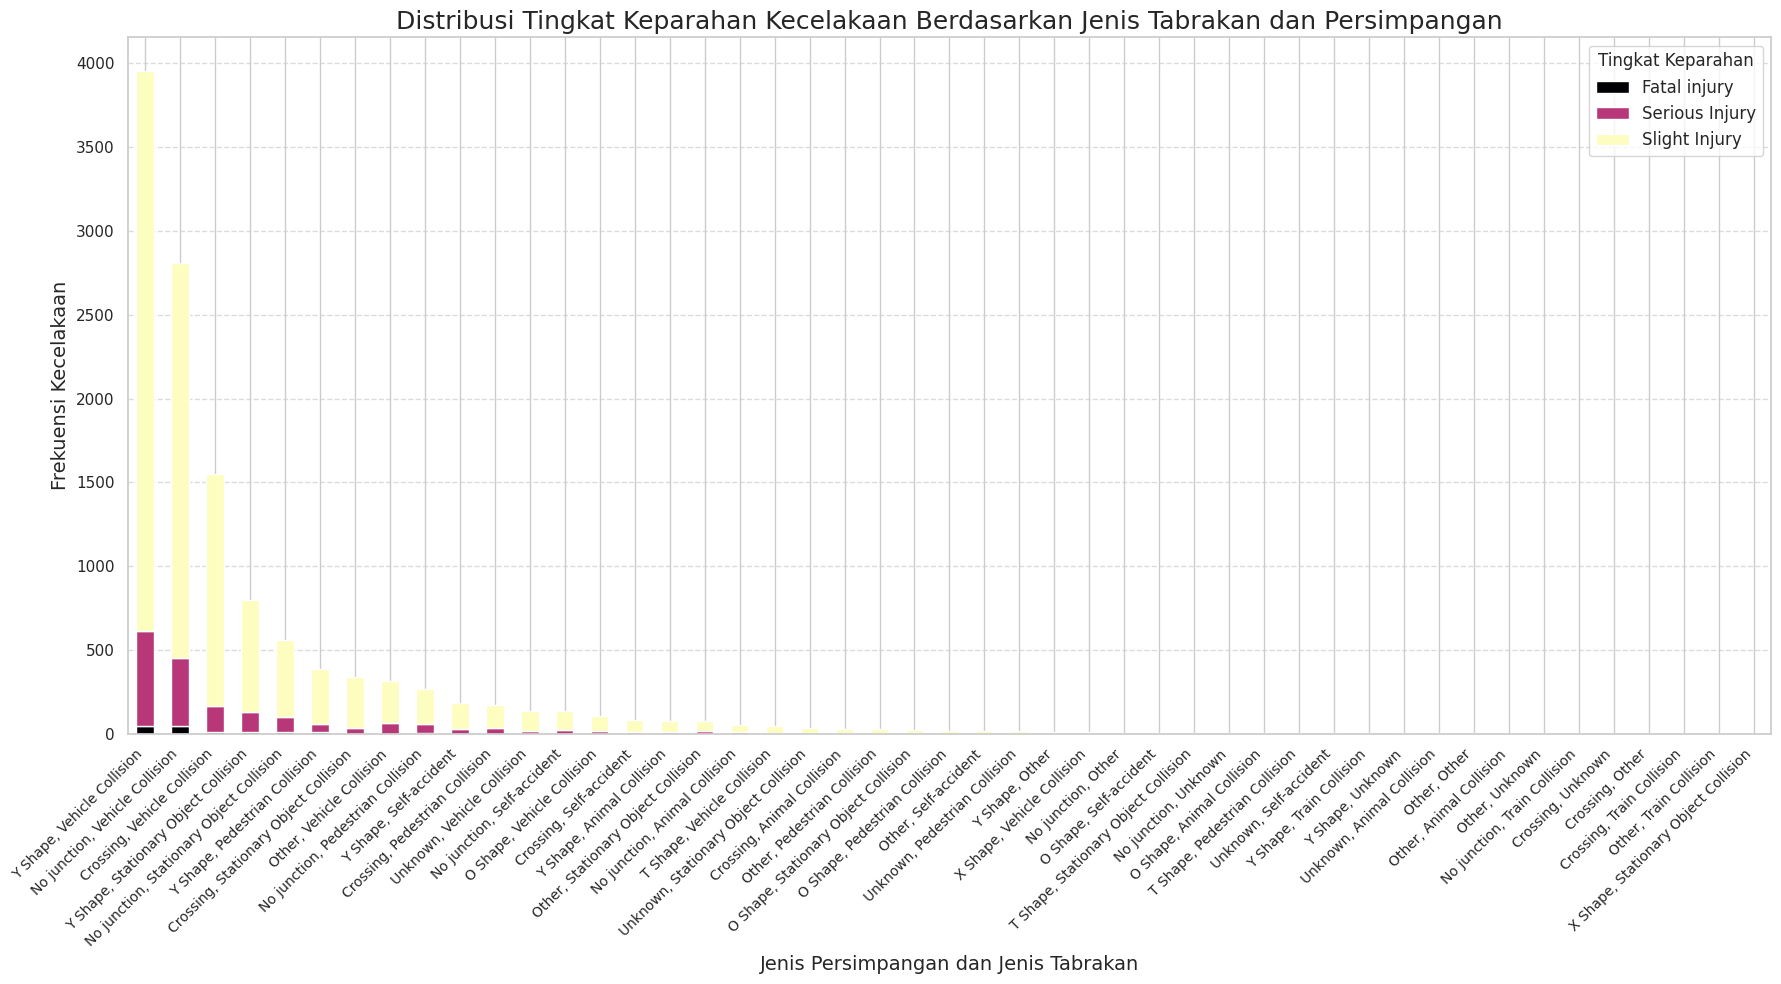

In [87]:
plt.figure(figsize=(14, 7))
sns.heatmap(pd.crosstab([df["Type_of_collision"], df["Accident_severity"]], df["Types_of_Junction"]), cmap="Reds", annot=True, fmt="d")
plt.title("Tipe Tabrakan vs Jenis Persimpangan vs Tingkat Keparahan")
plt.xlabel("Jenis Persimpangan")
plt.ylabel("Tipe Tabrakan dan Tingkat Keparahan")
plt.xticks(rotation=90)
plt.show()

if 'Type_of_collision' in df.columns and 'Types_of_Junction' in df.columns and 'Accident_severity' in df.columns:
    collision_junction_severity = df.groupby(['Types_of_Junction', 'Type_of_collision', 'Accident_severity']).size().unstack(fill_value=0)
    total_accidents = collision_junction_severity.sum(axis=1)
    collision_junction_severity = collision_junction_severity.loc[total_accidents.sort_values(ascending=False).index]
    plt.figure(figsize=(18, 10))
    ax = collision_junction_severity.plot(kind='bar', stacked=True, colormap='magma', figsize=(18, 10))
    plt.title('Distribusi Tingkat Keparahan Kecelakaan Berdasarkan Jenis Tabrakan dan Persimpangan', fontsize=18)
    plt.xlabel('Jenis Persimpangan dan Jenis Tabrakan', fontsize=14)
    plt.ylabel('Frekuensi Kecelakaan', fontsize=14)
    plt.legend(title='Tingkat Keparahan', fontsize=12)
    labels = [f'{j}, {c}' for j, c in collision_junction_severity.index]
    plt.xticks(range(len(labels)), labels, rotation=45, ha='right', fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("Kolom 'Type_of_collision', 'Types_of_Junction', atau 'Accident_severity' tidak ditemukan dalam dataset.")


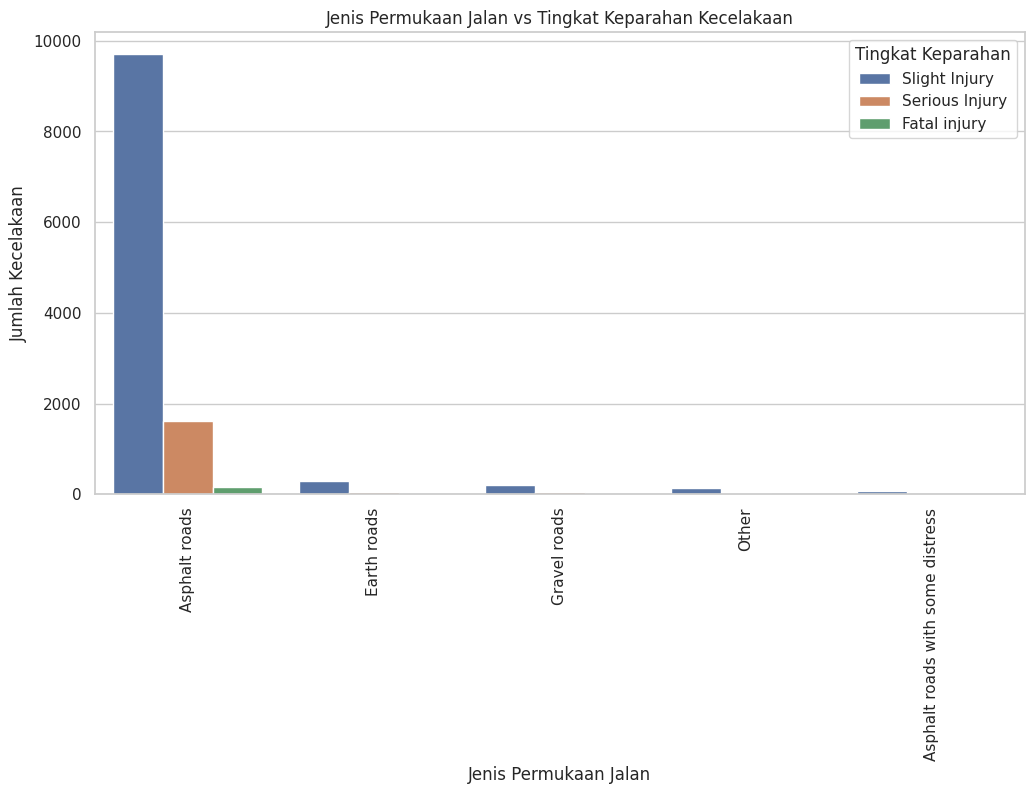

In [88]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="Road_surface_type", hue="Accident_severity", order=df["Road_surface_type"].value_counts().index)
plt.xticks(rotation=90)
plt.title("Jenis Permukaan Jalan vs Tingkat Keparahan Kecelakaan")
plt.xlabel("Jenis Permukaan Jalan")
plt.ylabel("Jumlah Kecelakaan")
plt.legend(title="Tingkat Keparahan")
plt.show()


<Figure size 1200x600 with 0 Axes>

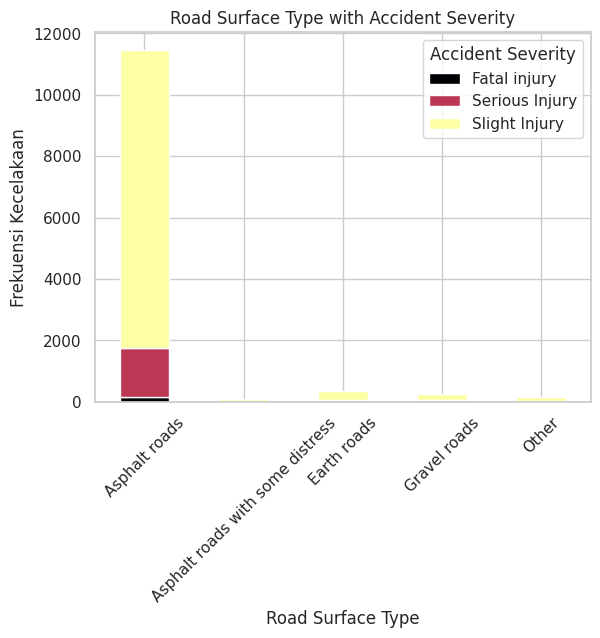

In [89]:
# Pastikan kolom 'Road_surface_type' dan 'Accident_severity' ada di dataset
if 'Road_surface_type' in df.columns and 'Accident_severity' in df.columns:
    # Hitung frekuensi kecelakaan berdasarkan jenis permukaan jalan dan severity
    road_severity = df.groupby(['Road_surface_type', 'Accident_severity']).size().unstack()

    # Plot Stacked Bar Chart
    plt.figure(figsize=(12, 6))
    road_severity.plot(kind='bar', stacked=True, colormap='inferno')
    plt.title('Road Surface Type with Accident Severity')
    plt.xlabel('Road Surface Type')
    plt.ylabel('Frekuensi Kecelakaan')
    plt.legend(title='Accident Severity')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Kolom 'Road_surface_type' atau 'Accident_severity' tidak ditemukan dalam dataset.")

In [90]:
# # Plot 1: Area kejadian vs tingkat keparahan kecelakaan
# plt.figure(figsize=(12, 6))
# sns.countplot(data=df, y="Area_accident_occured", hue="Accident_severity", palette="coolwarm",
#               order=df["Area_accident_occured"].value_counts().index)
# plt.title("Tingkat Keparahan Kecelakaan Berdasarkan Area Kejadian")
# plt.xlabel("Jumlah Kecelakaan")
# plt.ylabel("Area Kejadian")
# plt.legend(title="Tingkat Keparahan")
# plt.show()

# # Plot 2: Hari dalam seminggu dengan tingkat keparahan kecelakaan dan waktu kejadian
# # df["Day_of_Week"] = pd.to_datetime(df["Time"], format="%H:%M:%S").dt.dayofweek  # Simulasi hari
# # plt.figure(figsize=(12, 6))
# # sns.boxplot(data=df, x="Day_of_Week", y="Hour", hue="Accident_severity", palette="viridis")
# # plt.title("Hari dalam Seminggu vs Waktu Kejadian & Tingkat Keparahan")
# # plt.xlabel("Hari (0 = Senin, 6 = Minggu)")
# # plt.ylabel("Jam Kejadian")
# # plt.legend(title="Tingkat Keparahan")
# # plt.show()

# # Plot 3: Jenis persimpangan vs jumlah korban
# plt.figure(figsize=(12, 6))
# sns.barplot(data=df, x="Types_of_Junction", y="Number_of_casualties", palette="magma",
#             order=df.groupby("Types_of_Junction")["Number_of_casualties"].sum().sort_values(ascending=False).index)
# plt.title("Jumlah Korban Berdasarkan Jenis Persimpangan")
# plt.xlabel("Jenis Persimpangan")
# plt.ylabel("Jumlah Korban")
# plt.xticks(rotation=45)
# plt.show()

# # Plot 4: Kondisi pencahayaan dan jenis persimpangan
# plt.figure(figsize=(12, 6))
# sns.heatmap(df.pivot_table(index="Light_conditions", columns="Types_of_Junction", aggfunc="size", fill_value=0), 
#             cmap="Blues", annot=True, fmt="d")
# plt.title("Kondisi Pencahayaan vs Jenis Persimpangan")
# plt.xlabel("Jenis Persimpangan")
# plt.ylabel("Kondisi Pencahayaan")
# plt.show()

# # Plot 5: Jenis tabrakan, jenis persimpangan, dan tingkat keparahan kecelakaan
# plt.figure(figsize=(12, 6))
# sns.catplot(data=df, x="Type_of_collision",plt.figure(figsize=(10, 6))
# sns.countplot(y='Type_of_collision', df=df, order=df['Type_of_collision'].value_counts().index)
# plt.title('Jenis Kecelakaan yang Paling Umum')
# plt.xlabel('Frekuensi')
# plt.ylabel('Jenis Kecelakaan')
# plt.show() hue="Accident_severity", col="Types_of_Junction",
#             kind="count", col_wrap=3, palette="Set2", height=4, aspect=1.5)
# plt.xticks(rotation=45)
# plt.subplots_adjust(top=0.9)
# plt.suptitle("Jenis Tabrakan vs Jenis Persimpangan & Tingkat Keparahan")
# plt.show()

# # Plot 6: Jenis permukaan jalan vs tingkat keparahan kecelakaan
# plt.figure(figsize=(12, 6))
# sns.countplot(data=df, y="Road_surface_type", hue="Accident_severity", palette="coolwarm",
#               order=df["Road_surface_type"].value_counts().index)
# plt.title("Tingkat Keparahan Kecelakaan Berdasarkan Jenis Permukaan Jalan")
# plt.xlabel("Jumlah Kecelakaan")
# plt.ylabel("Jenis Permukaan Jalan")
# plt.legend(title="Tingkat Keparahan")
# plt.show()


# Aplikasi Navigasi, BMKG, gps

- Weather Conditions, time, days of week
- Time, accident severity
- Road surface conditions, Accident severity
- Road surface type, weather conditions, accident severity



# Asuransi dan Rental Mobil

- Sex of driver accident severity
- Age of band accident severity (dataset yang belum di prerpo)
- Type of vhicle with accident severity
- Type of vehicle, owner of vehicle, accident severity

# Media 
- Time, wether, days of week (buatkan visualisasi ketiga fitur tersebut, atau mungkin kalo tidak bisa, bisa menggunakan 2 2 dan bisa di korelasikan)
- Number of casualties, number of vehicle involved, accident severity (buatkan visualisasi ketiga fitur tersebut, atau mungkin kalo tidak bisa, bisa menggunakan 2 2 dan bisa di korelasikan)

/tmp/ipykernel_4990/2695158745.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Accident_severity", order=df["Accident_severity"].value_counts().index, palette="coolwarm")


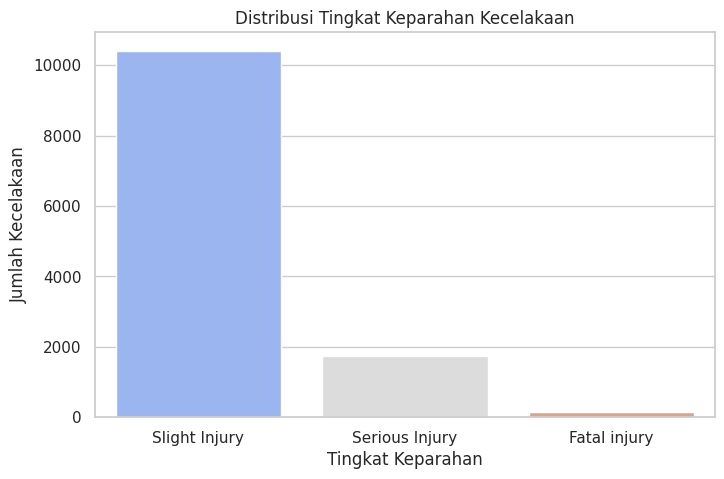

/tmp/ipykernel_4990/2695158745.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y="Type_of_vehicle", order=df["Type_of_vehicle"].value_counts().index, palette="viridis")


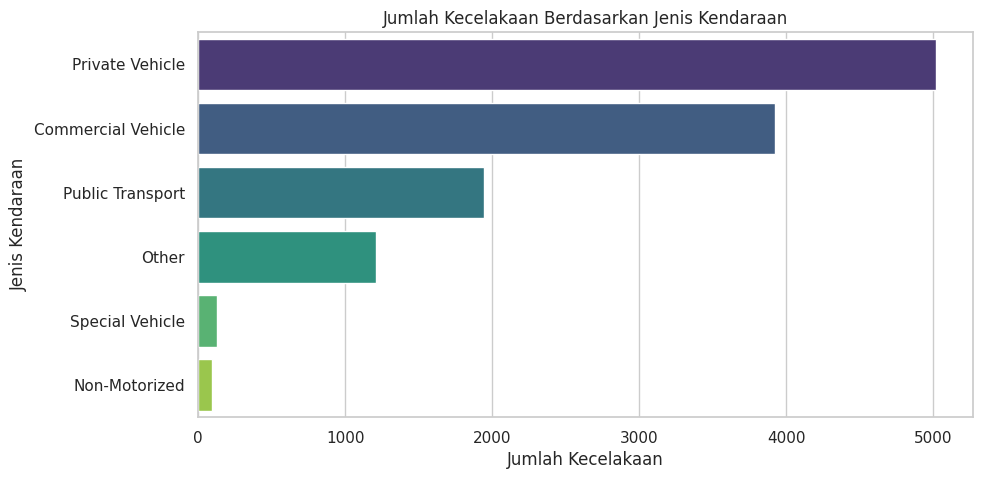

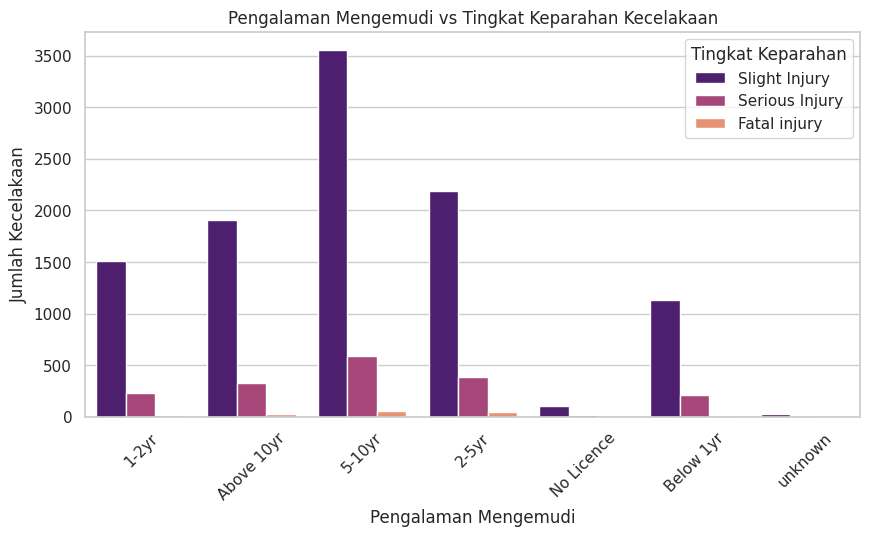

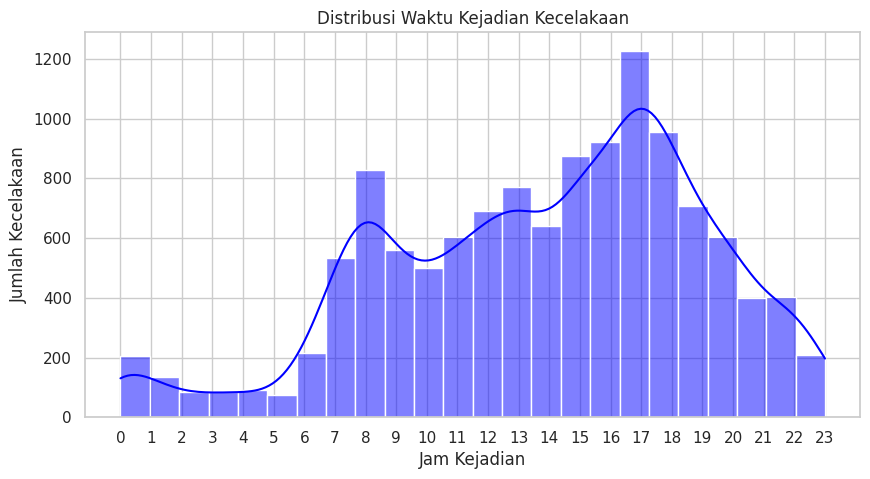

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Accident_severity", order=df["Accident_severity"].value_counts().index, palette="coolwarm")
plt.title("Distribusi Tingkat Keparahan Kecelakaan")
plt.xlabel("Tingkat Keparahan")
plt.ylabel("Jumlah Kecelakaan")
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(data=df, y="Type_of_vehicle", order=df["Type_of_vehicle"].value_counts().index, palette="viridis")
plt.title("Jumlah Kecelakaan Berdasarkan Jenis Kendaraan")
plt.xlabel("Jumlah Kecelakaan")
plt.ylabel("Jenis Kendaraan")
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="Driving_experience", hue="Accident_severity", palette="magma")
plt.title("Pengalaman Mengemudi vs Tingkat Keparahan Kecelakaan")
plt.xlabel("Pengalaman Mengemudi")
plt.ylabel("Jumlah Kecelakaan")
plt.xticks(rotation=45)
plt.legend(title="Tingkat Keparahan")
plt.show()

df["Hour"] = pd.to_datetime(df["Time"], format="%H:%M:%S").dt.hour
plt.figure(figsize=(10, 5))
sns.histplot(df["Hour"], bins=24, kde=True, color="blue")
plt.title("Distribusi Waktu Kejadian Kecelakaan")
plt.xlabel("Jam Kejadian")
plt.ylabel("Jumlah Kecelakaan")
plt.xticks(range(0, 24))
plt.show()


/tmp/ipykernel_4990/2626451856.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour'] = pd.to_datetime(df['Time']).dt.hour.apply(lambda x: f"{x:02d}:00")
/tmp/ipykernel_4990/2626451856.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = df.pivot_table(index="Day", columns="Hour", values="Accident_severity", aggfunc="count", fill_value=0)


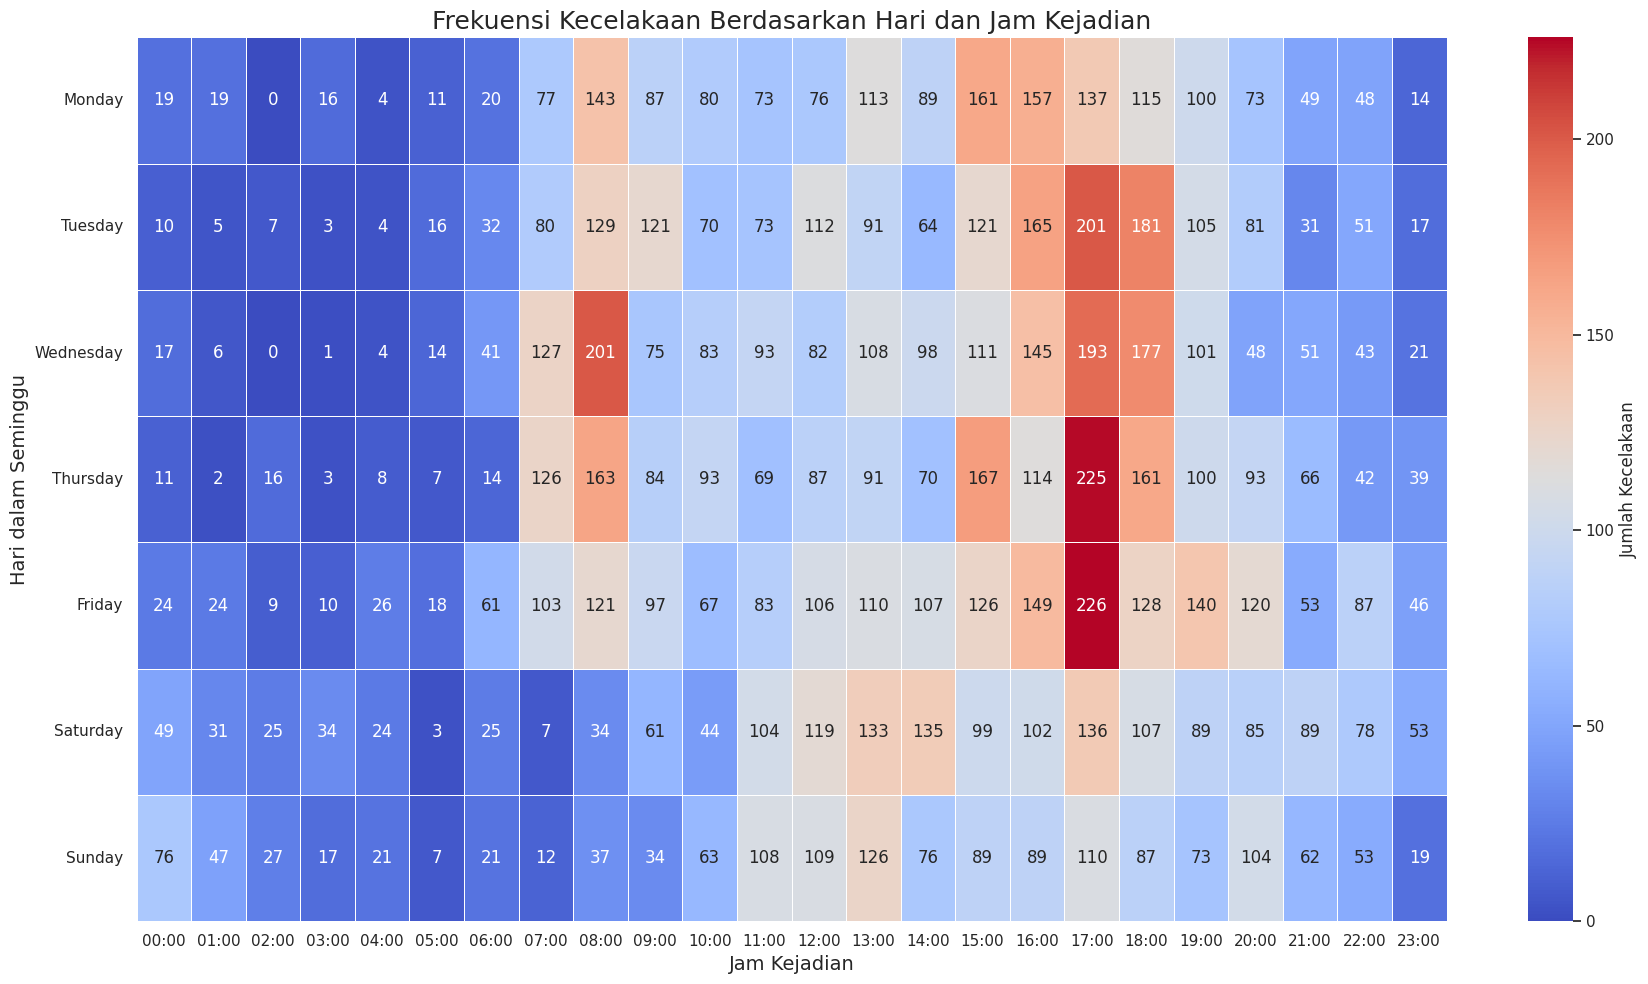

In [94]:
if 'Day' in df.columns and 'Time' in df.columns:
    df['Hour'] = pd.to_datetime(df['Time']).dt.hour.apply(lambda x: f"{x:02d}:00")
    days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    df['Day'] = pd.Categorical(df['Day'], categories=days_order, ordered=True)
    heatmap_data = df.pivot_table(index="Day", columns="Hour", values="Accident_severity", aggfunc="count", fill_value=0)
    plt.figure(figsize=(18, 10))
    sns.heatmap(heatmap_data, cmap="coolwarm", annot=True, fmt="d", linewidths=0.5, cbar_kws={'label': 'Jumlah Kecelakaan'})
    plt.title("Frekuensi Kecelakaan Berdasarkan Hari dan Jam Kejadian", fontsize=18)
    plt.xlabel("Jam Kejadian", fontsize=14)
    plt.ylabel("Hari dalam Seminggu", fontsize=14)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
else:
    print("Kolom 'Day' atau 'Time' tidak ditemukan dalam dataset.")

/tmp/ipykernel_4990/2626451856.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour'] = pd.to_datetime(df['Time']).dt.hour.apply(lambda x: f"{x:02d}:00")
/tmp/ipykernel_4990/2626451856.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = df.pivot_table(index="Day", columns="Hour", values="Accident_severity", aggfunc="count", fill_value=0)


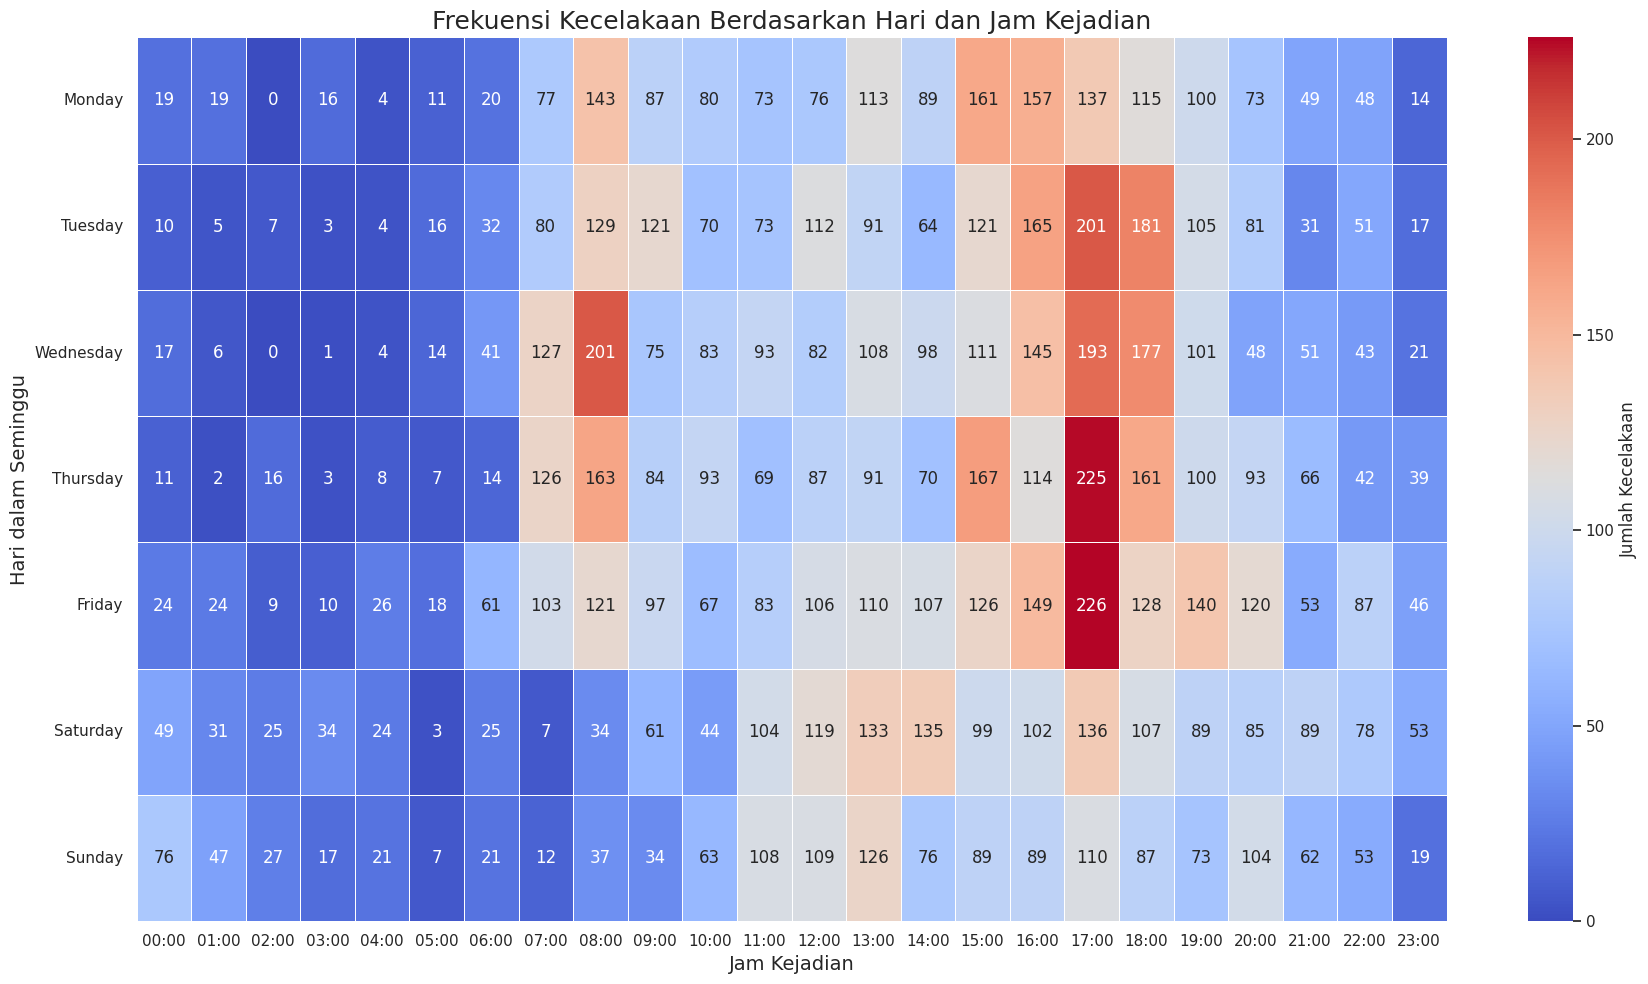

In [98]:
if 'Day' in df.columns and 'Time' in df.columns:
    df['Hour'] = pd.to_datetime(df['Time']).dt.hour.apply(lambda x: f"{x:02d}:00")
    days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    df['Day'] = pd.Categorical(df['Day'], categories=days_order, ordered=True)
    heatmap_data = df.pivot_table(index="Day", columns="Hour", values="Accident_severity", aggfunc="count", fill_value=0)
    plt.figure(figsize=(18, 10))
    sns.heatmap(heatmap_data, cmap="coolwarm", annot=True, fmt="d", linewidths=0.5, cbar_kws={'label': 'Jumlah Kecelakaan'})
    plt.title("Frekuensi Kecelakaan Berdasarkan Hari dan Jam Kejadian", fontsize=18)
    plt.xlabel("Jam Kejadian", fontsize=14)
    plt.ylabel("Hari dalam Seminggu", fontsize=14)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
else:
    print("Kolom 'Day' atau 'Time' tidak ditemukan dalam dataset.")

/tmp/ipykernel_4990/1104250197.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour'] = pd.to_datetime(df['Time']).dt.hour.apply(lambda x: f"{x:02d}:00")


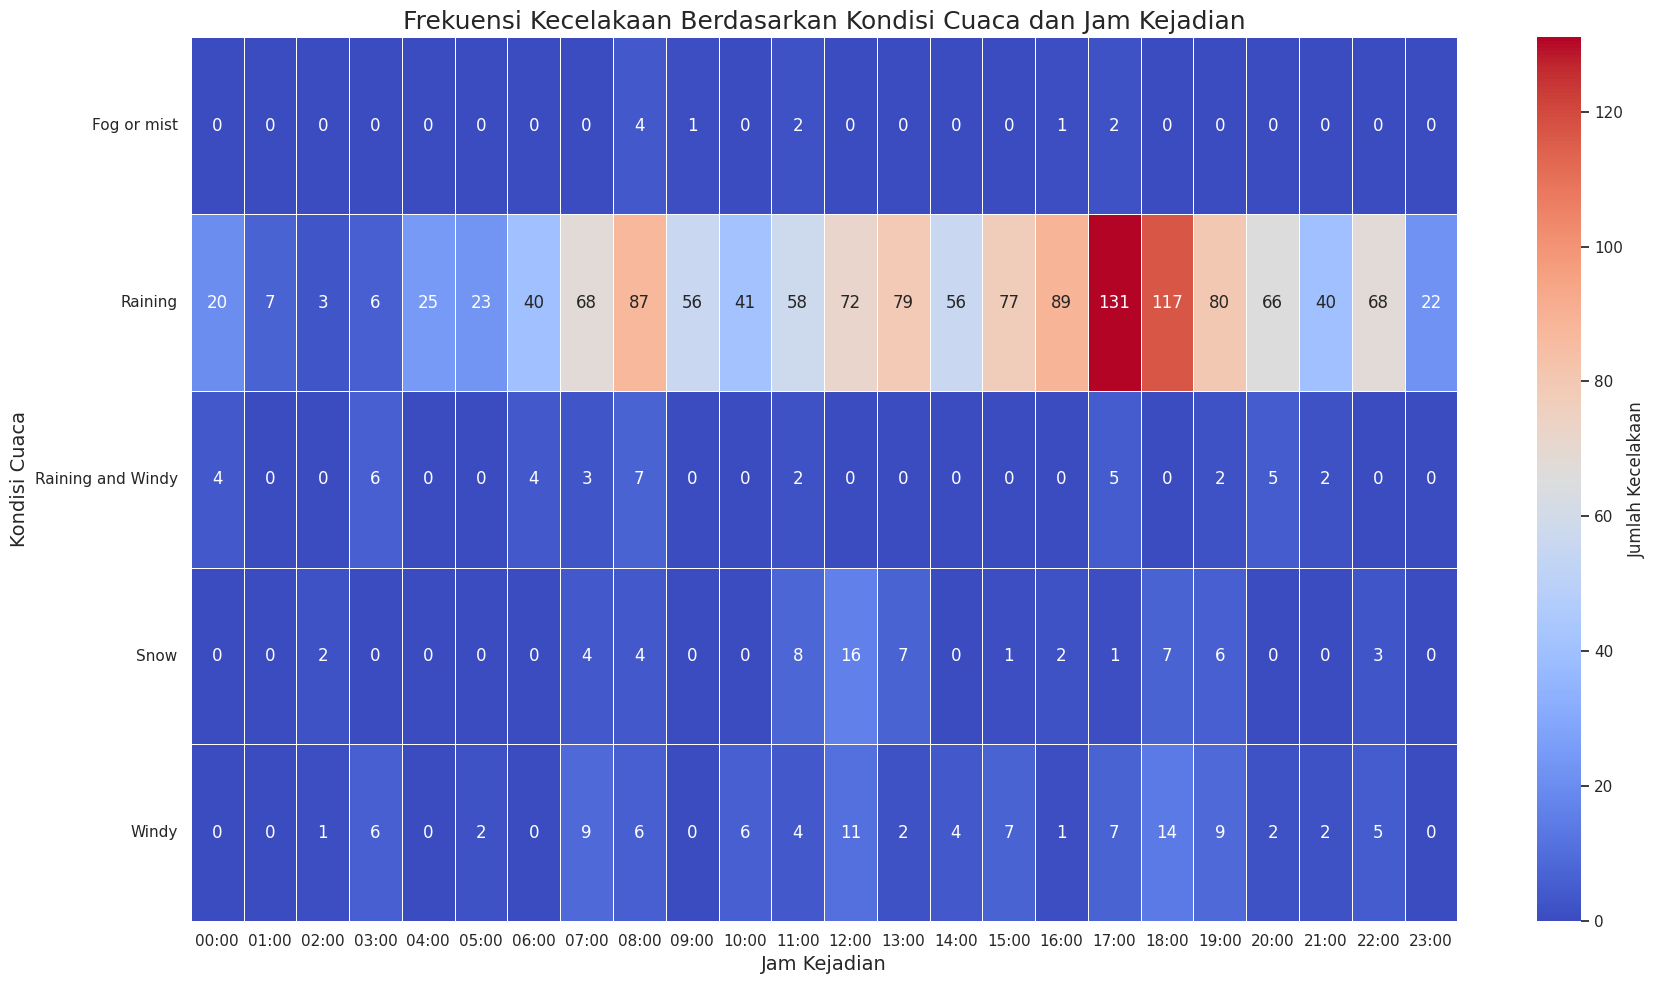

In [100]:
# Pastikan kolom 'Weather_conditions' dan 'Time' ada di dataset
if 'Weather_conditions' in df.columns and 'Time' in df.columns:
    df['Hour'] = pd.to_datetime(df['Time']).dt.hour.apply(lambda x: f"{x:02d}:00")

    # Filter DataFrame berdasarkan kondisi cuaca yang diinginkan
    weather_conditions_list = ["Raining", "Raining and Windy", "Snow", "Windy", "Fog or mist"]
    filtered_df = df[df['Weather_conditions'].isin(weather_conditions_list)]

    heatmap_data = filtered_df.pivot_table(index="Weather_conditions", columns="Hour", values="Accident_severity", aggfunc="count", fill_value=0)

    plt.figure(figsize=(18, 10))
    sns.heatmap(heatmap_data, cmap="coolwarm", annot=True, fmt="d", linewidths=0.5, cbar_kws={'label': 'Jumlah Kecelakaan'})
    plt.title("Frekuensi Kecelakaan Berdasarkan Kondisi Cuaca dan Jam Kejadian", fontsize=18)
    plt.xlabel("Jam Kejadian", fontsize=14)
    plt.ylabel("Kondisi Cuaca", fontsize=14)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
else:
    print("Kolom 'Weather_conditions' atau 'Time' tidak ditemukan dalam dataset.")

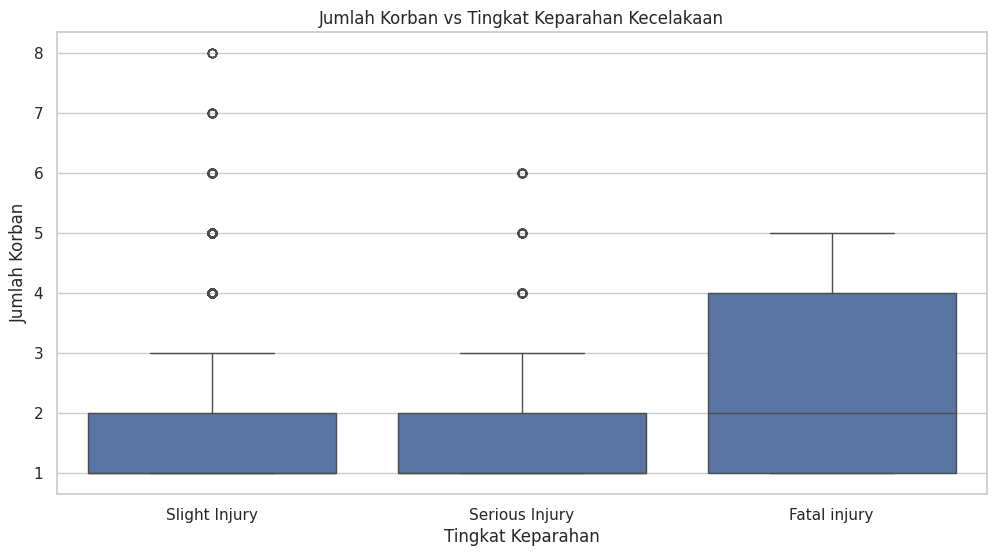

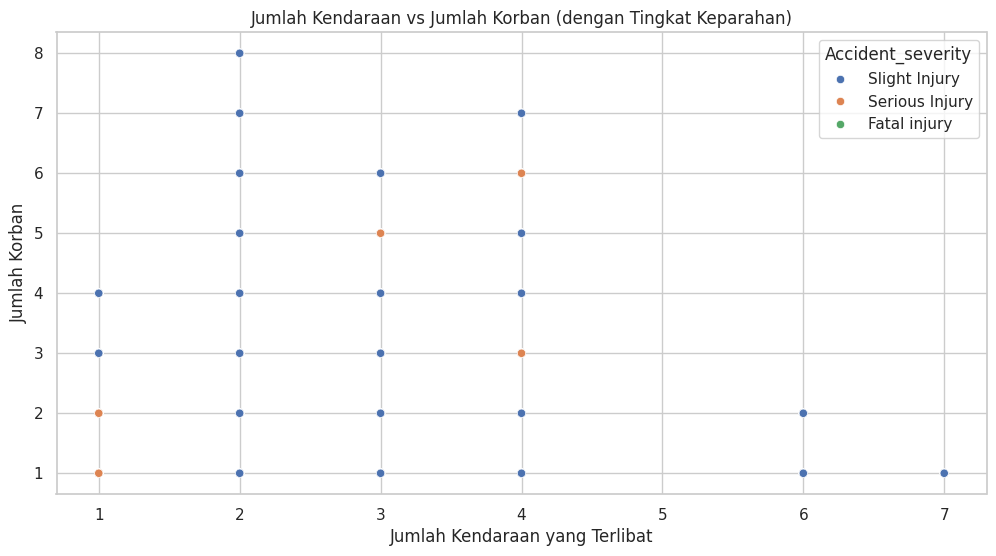

ValueError: could not convert string to float: 'Slight Injury'

In [ ]:
# if 'Number_of_casualties' in df.columns and 'Number_of_vehicles_involved' in df.columns and 'Accident_severity' in df.columns:
#     # Visualisasi 1: Boxplot Jumlah Korban vs Tingkat Keparahan
#     plt.figure(figsize=(12, 6))
#     sns.boxplot(x='Accident_severity', y='Number_of_casualties', data=df)
#     plt.title('Jumlah Korban vs Tingkat Keparahan Kecelakaan')
#     plt.xlabel('Tingkat Keparahan')
#     plt.ylabel('Jumlah Korban')
#     plt.show()

#     # Visualisasi 2: Scatter Plot Jumlah Kendaraan vs Jumlah Korban (dengan Hue Tingkat Keparahan)
#     plt.figure(figsize=(12, 6))
#     sns.scatterplot(x='Number_of_vehicles_involved', y='Number_of_casualties', hue='Accident_severity', data=df)
#     plt.title('Jumlah Kendaraan vs Jumlah Korban (dengan Tingkat Keparahan)')
#     plt.xlabel('Jumlah Kendaraan yang Terlibat')
#     plt.ylabel('Jumlah Korban')
#     plt.show()

#     # Visualisasi 3: Heatmap Korelasi
#     correlation_matrix = df[['Number_of_casualties', 'Number_of_vehicles_involved', 'Accident_severity']].corr()
#     plt.figure(figsize=(8, 6))
#     sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
#     plt.title('Matriks Korelasi')
#     plt.show()
# else:
#     print("Kolom 'Number_of_casualties', 'Number_of_vehicles_involved', atau 'Accident_severity' tidak ditemukan dalam dataset.")

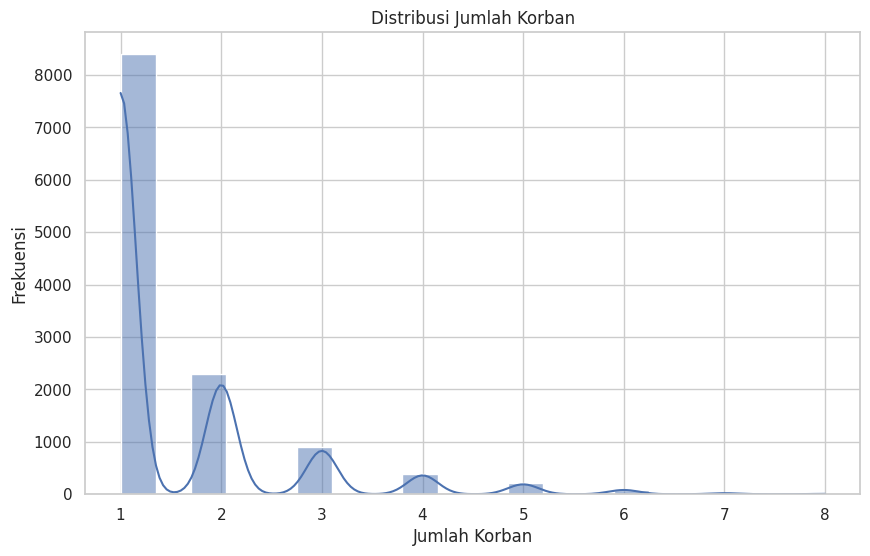

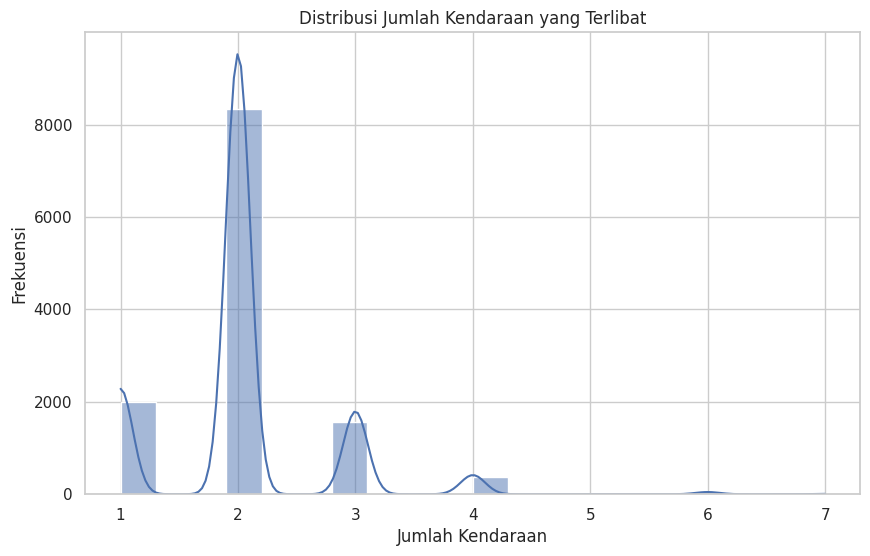

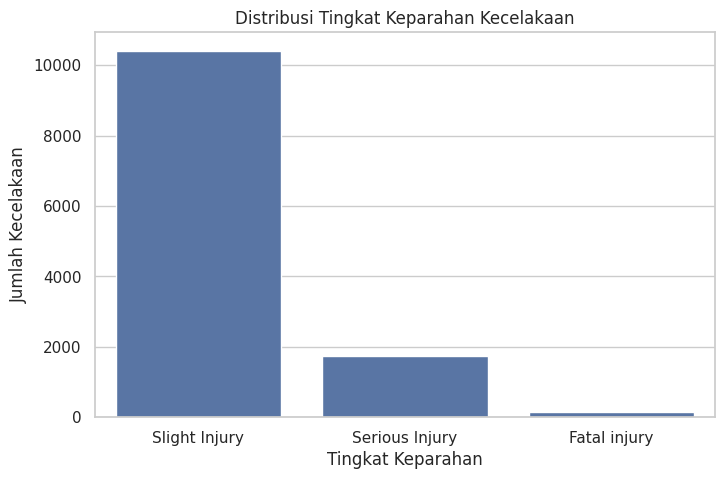

ValueError: could not convert string to float: 'Slight Injury'

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan df Anda sudah dimuat dengan benar
# df = pd.read_csv('cleanedfix.csv')

# Pastikan kolom yang diperlukan ada di dataset
if 'Number_of_casualties' in df.columns and 'Number_of_vehicles_involved' in df.columns and 'Accident_severity' in df.columns:
    # Visualisasi 1: Distribusi Jumlah Korban
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Number_of_casualties'], bins=20, kde=True)
    plt.title('Distribusi Jumlah Korban')
    plt.xlabel('Jumlah Korban')
    plt.ylabel('Frekuensi')
    plt.show()

    # Visualisasi 2: Distribusi Jumlah Kendaraan yang Terlibat
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Number_of_vehicles_involved'], bins=20, kde=True)
    plt.title('Distribusi Jumlah Kendaraan yang Terlibat')
    plt.xlabel('Jumlah Kendaraan')
    plt.ylabel('Frekuensi')
    plt.show()

    # Visualisasi 3: Countplot Tingkat Keparahan Kecelakaan
    plt.figure(figsize=(8, 5))
    sns.countplot(x='Accident_severity', data=df, order=df['Accident_severity'].value_counts().index)
    plt.title('Distribusi Tingkat Keparahan Kecelakaan')
    plt.xlabel('Tingkat Keparahan')
    plt.ylabel('Jumlah Kecelakaan')
    plt.show()

    # Visualisasi 4: Korelasi antara Ketiga Fitur
    correlation_matrix = df[['Number_of_casualties', 'Number_of_vehicles_involved', 'Accident_severity']].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Matriks Korelasi')
    plt.show()

    # Visualisasi 5: Scatter Plot Jumlah Korban vs Jumlah Kendaraan
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Number_of_vehicles_involved', y='Number_of_casualties', data=df, hue='Accident_severity')
    plt.title('Jumlah Korban vs Jumlah Kendaraan yang Terlibat')
    plt.xlabel('Jumlah Kendaraan')
    plt.ylabel('Jumlah Korban')
    plt.show()
else:
    print("Kolom 'Number_of_casualties', 'Number_of_vehicles_involved', atau 'Accident_severity' tidak ditemukan dalam dataset.")

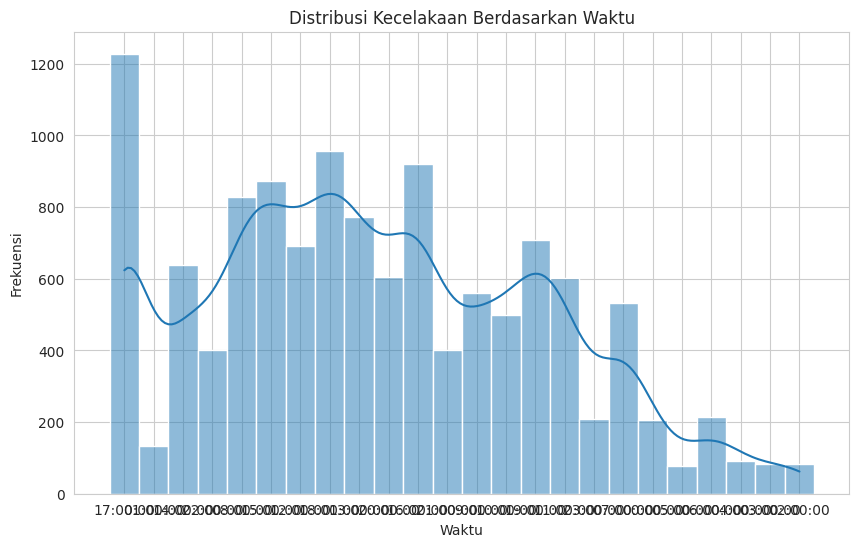

ValueError: Could not interpret value `Cause_of_accident` for `y`. Value is a string, but `data` was not passed.

<Figure size 1000x600 with 0 Axes>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load df
# df = pd.read_csv('cleanedfix.csv')

# 1. Distribusi Kecelakaan Berdasarkan Waktu
plt.figure(figsize=(10, 6))
sns.histplot(df['Time'], bins=24, kde=True)
plt.title('Distribusi Kecelakaan Berdasarkan Waktu')
plt.xlabel('Waktu')
plt.ylabel('Frekuensi')
plt.show()

# 2. Jenis Kecelakaan yang Paling Umum
plt.figure(figsize=(10, 6))
sns.countplot(y='Type_of_collision', df=df, order=df['Type_of_collision'].value_counts().index)
plt.title('Jenis Kecelakaan yang Paling Umum')
plt.xlabel('Frekuensi')
plt.ylabel('Jenis Kecelakaan')
plt.show()

# 3. Penyebab Utama Kecelakaan
plt.figure(figsize=(10, 6))
sns.countplot(y='Cause_of_accident', df=df, order=df['Cause_of_accident'].value_counts().index)
plt.title('Penyebab Utama Kecelakaan')
plt.xlabel('Frekuensi')
plt.ylabel('Penyebab Kecelakaan')
plt.show()

# 4. Severity of Accidents
plt.figure(figsize=(10, 6))
df['Accident_severity'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Severity of Accidents')
plt.ylabel('')
plt.show()

# 5. Kecelakaan Berdasarkan Jenis Kendaraan
plt.figure(figsize=(10, 6))
sns.countplot(y='Type_of_vehicle', df=df, order=df['Type_of_vehicle'].value_counts().index)
plt.title('Kecelakaan Berdasarkan Jenis Kendaraan')
plt.xlabel('Frekuensi')
plt.ylabel('Jenis Kendaraan')
plt.show()

/tmp/ipykernel_4990/1970880758.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Day_of_Week", order=df["Day_of_Week"].value_counts().index, ax=axes[0], palette="viridis")
/tmp/ipykernel_4990/1970880758.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.countplot(data=df, x="Day_of_Week", order=df["Day_of_Week"].value_counts().index, ax=axes[0], palette="viridis")
/tmp/ipykernel_4990/1970880758.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Weather_conditions", y="Hour", ax=axes[1], palette="coolwarm")
/tmp/ipykernel_4990/1970880758.py:22: FutureWarning: The default value of observed=False is deprecated and will change

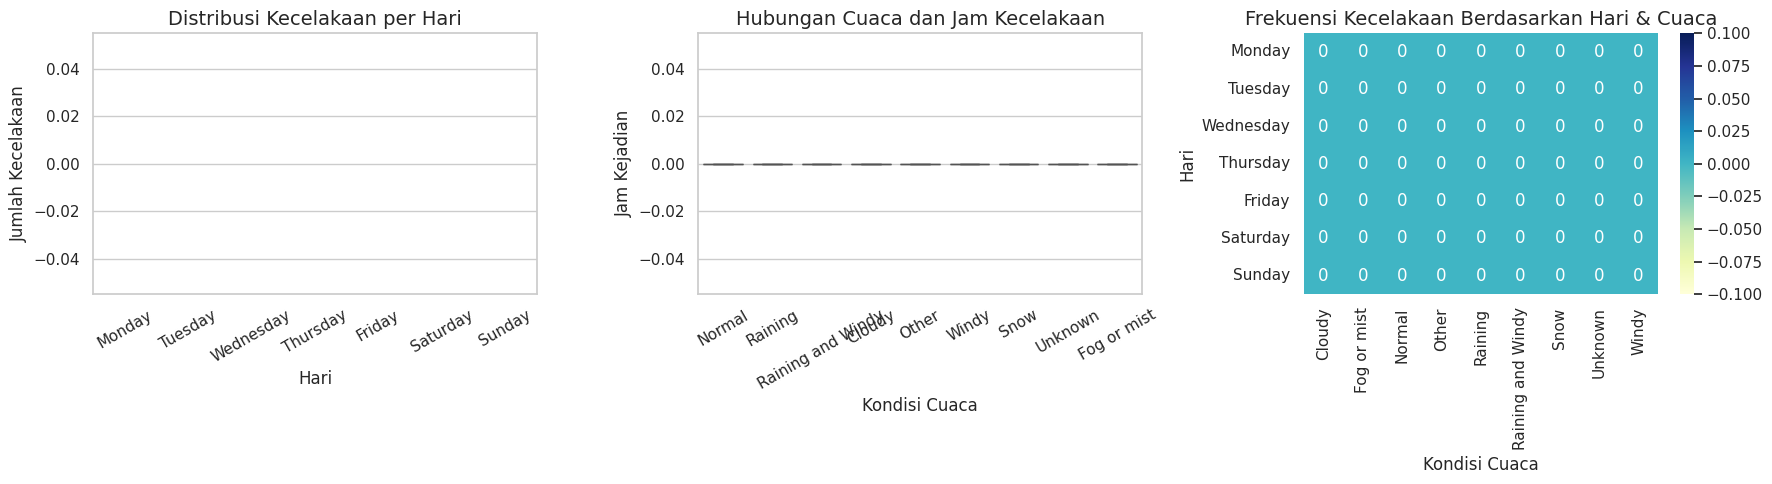

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur ukuran figure
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# a) Distribusi kecelakaan berdasarkan hari dalam seminggu
sns.countplot(data=df, x="Day_of_Week", order=df["Day_of_Week"].value_counts().index, ax=axes[0], palette="viridis")
axes[0].set_title("Distribusi Kecelakaan per Hari", fontsize=14)
axes[0].set_xlabel("Hari")
axes[0].set_ylabel("Jumlah Kecelakaan")
axes[0].tick_params(axis='x', rotation=30)

# b) Hubungan antara waktu dan cuaca terhadap kecelakaan
sns.boxplot(data=df, x="Weather_conditions", y="Hour", ax=axes[1], palette="coolwarm")
axes[1].set_title("Hubungan Cuaca dan Jam Kecelakaan", fontsize=14)
axes[1].set_xlabel("Kondisi Cuaca")
axes[1].set_ylabel("Jam Kejadian")
axes[1].tick_params(axis='x', rotation=30)

# c) Korelasi antara hari dan kondisi cuaca terhadap kecelakaan
heatmap_data = df.pivot_table(index="Day_of_Week", columns="Weather_conditions", aggfunc="size", fill_value=0)
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt="d", ax=axes[2])
axes[2].set_title("Frekuensi Kecelakaan Berdasarkan Hari & Cuaca", fontsize=14)
axes[2].set_xlabel("Kondisi Cuaca")
axes[2].set_ylabel("Hari")

plt.tight_layout()
plt.show()


0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
12311    NaN
12312    NaN
12313    NaN
12314    NaN
12315    NaN
Name: Day_of_Week, Length: 12316, dtype: category
Categories (7, object): ['Monday' < 'Tuesday' < 'Wednesday' < 'Thursday' < 'Friday' < 'Saturday' < 'Sunday']